# Analysis and Forecast of Electricity Generation in Colombia's National Interconnected System (SIN)


## **1. Introducción**  
### **1.1. Contexto: Análisis y pronóstico de la generación de electricidad en el Sistema Interconectado Nacional (SIN) de Colombia.**  
### **1.2. Objetivo: Identificar tendencias, explorar la relación con eventos climáticos, y desarrollar un modelo predictivo.**  
### **1.3. Fuente de los datos.**

This project utilizes hourly generation data from the National Interconnected System (SIN), spanning from 1995 to 2022. The data is categorized by generating plant and type of generation
Obtained from: [SINERGOX DATASET](https://sinergox.xm.com.co/oferta/Paginas/Historicos/Historicos.aspx?RootFolder=%2Foferta%2FHistricos%2FGeneraci%C3%B3n&FolderCTID=0x012000B3FC86CB37661147B52CAE93637C1249&View=%7B946210C0%2D4071%2D4173%2D964C%2DED5BCCE4E66C%7D)



## **2. Carga y Exploración de los Datos**  


### **2.1. Carga de datos.**  

There is a single Excel file for each year, so it's necessary to load the data individually.

**Proceso:**


In [2]:
pip install unidecode


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from unidecode import unidecode
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


#### **2.1.1. Lectura de datos:**
   - Se leen archivos de Excel correspondientes a la generación de energía desde 1995 hasta 2022. 
   - Cada archivo contiene datos anuales, con ajustes en el encabezado (`header`) según su formato específico.
   - Los DataFrames individuales se almacenan en una lista llamada `dataframes` para facilitar su manejo conjunto.

In [4]:
dataframes=[]
df1=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_1995.xlsx",header=2)
dataframes.append(df1)
#print(1)
df2=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_1996.xlsx",header=0)
dataframes.append(df2)
#print(1)
df3=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_1997.xlsx",header=1)
dataframes.append(df3)
#print(1)
df4=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_1998.xlsx",header=1)
dataframes.append(df4)
#print(1)
df5=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_1999.xlsx",header=1)
dataframes.append(df5)
#print(1)
df6=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2000.xlsx",header=2)
dataframes.append(df6)
#print(1)
df7=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2001.xlsx",header=1)
dataframes.append(df7)
#print(1)
df8=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2002.xlsx",header=1)
dataframes.append(df8)
#print(1)
df9=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2003.xlsx",header=2)
dataframes.append(df9)
#print(1)
df10=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2004.xlsx",header=1)
dataframes.append(df10)
#print(1)
df11=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2005.xlsx",header=1)
dataframes.append(df11)
#print(1)
df12=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2006.xlsx",header=2)
dataframes.append(df12)
#print(1)
df13=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2007.xlsx",header=2)
dataframes.append(df13)
#print(1)
df14=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2008.xlsx",header=2)
dataframes.append(df14)
#print(1)
df15=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2009.xlsx",header=2)
dataframes.append(df15)
#print(1)
df16=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2010.xlsx",header=2)
dataframes.append(df16)
#print(1)
df17=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2011.xlsx",header=2)
dataframes.append(df17)
#print(1)
df18=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2012.xlsx",header=2)
dataframes.append(df18)
#print(1)
df19=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2013.xlsx",header=2)
dataframes.append(df19)
#print(1)
df20=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2014.xlsx",header=2)
dataframes.append(df20)
#print(1)
df21=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2015.xlsx",header=2)
dataframes.append(df21)
#print(1)
df22=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2016.xlsx",header=2)
dataframes.append(df22)
#print(1)
df23=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2017 .xlsx",header=2)
dataframes.append(df23)
#print(1)
df24=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2018.xlsx",header=2)
dataframes.append(df24)
#print(1)
df25=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2019.xlsx",header=2)
dataframes.append(df25)
#print(1)
df26=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2020.xlsx",header=2)
dataframes.append(df26)
#print(1)
df27=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2021.xlsx",header=2)
dataframes.append(df27)
print(1)
df28=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Electrical Grid Data Analysis and Forecasting\Dataa\Generacion_(kWh)_2022.xlsx",header=2)
dataframes.append(df28)
#print(1)

              

1



#### **2.1.2. Validación de columnas:**
   - Se imprimen las columnas de cada DataFrame para verificar que se han leído correctamente y facilitar su posterior estandarización o análisis.

In [5]:
for i in range(len(dataframes)):
    print(dataframes[i].columns)

Index(['Fecha', 'Recurso', 'Código Agente', 'Tipo Generacion', 'Tipo Despacho',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')
Index([          'Fecha',         'Recurso',   'Codigo Agente',
       'Tipo Generacion',   'Tipo Despacho',                 0,
                       1,                 2,                 3,
                       4,                 5,                 6,
                       7,                 8,                 9,
                      10,                11,                12,
                      13,                14,                15,
                      16,                17,                18,
                      19,                20,                21,
                      22,                23],
      dtype='object')
Index([          'Fecha',         'Recurso',   'Codigo Agente',
       'Tipo Generacion',   'Tipo Despach


## **3. Preparación y Limpieza de Datos**


### **3.1. Normalización de columnas.**  
The column names of most dataframes are similar, but there are cases where some contain Spanish diacritical marks or numbers formatted as integers. Therefore, it is necessary to remove the diacritical marks (using the unidecode library) and convert all dataframe column names to strings.

**Proceso:**

1. **Copiar lista de DataFrames:**
   - Se realiza una copia de la lista `dataframes` para evitar modificar los datos originales.

2. **Definición de la función de normalización:**
   - La función `columnas()` normaliza los nombres de las columnas en cada DataFrame:
     - Si un nombre de columna contiene un número entero, se convierte a string y se eliminan las tildes de las letras.
     - Si no hay números, simplemente se eliminan las tildes de las letras de los nombres de las columnas.

3. **Aplicación de la normalización:**
   - La función `columnas()` se aplica a cada DataFrame de la lista `dataframes1` para asegurar que todos los nombres de las columnas sean consistentes.

4. **Verificación de cambios:**
   - Se imprime la lista de columnas antes y después de la normalización para verificar que los cambios se hayan realizado correctamente.


In [6]:
# Make a copy of the dataframes list to avoid modifying the original data
dataframes1 = dataframes.copy()

def columnas(df):
    # Check if there is an integer in the column names
    if 0 in df.columns:
        # If there is an integer in the columns, first convert all the integers into strings
        keys = df.columns.tolist()  # Get a list of the current column names
        values = df.columns.astype(str)  # Convert the column names to strings
        dic = dict(zip(keys, values))  # Create a dictionary to map old column names to new string column names
        df.rename(columns=dic, inplace=True)  # Rename the columns using the dictionary

        # Remove diacritical marks from the column names
        keys1 = df.columns.tolist()  # Get the updated list of column names
        values2 = [unidecode(value) for value in df.columns.tolist()]  # Remove diacritical marks from the column names
        df.rename(columns=dict(zip(keys1, values2)), inplace=True)  # Rename the columns using the updated names
    else:
        # If there are no integers in the columns, just remove the diacritical marks from the column names
        values = df.columns.astype(str)  # Convert the column names to strings
        keys = df.columns.tolist()  # Get the list of current column names
        values = [unidecode(value) for value in df.columns.tolist()]  # Remove diacritical marks from the column names
        dic = dict(zip(keys, values))  # Create a dictionary to map old column names to new names without diacritical marks
        df.rename(columns=dic, inplace=True)  # Rename the columns using the dictionary

# Apply the column normalization function to each dataframe in the list
for i in range(len(dataframes1)):
    columnas(dataframes1[i])

# Display the columns of the 22nd dataframe to verify the changes
print("Before:",dataframes[2].columns)
print("After :",dataframes1[4].columns)


Before: Index(['Fecha', 'Recurso', 'Codigo Agente', 'Tipo Generacion', 'Tipo Despacho',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')
After : Index(['Fecha', 'Recurso', 'Codigo Agente', 'Tipo Generacion', 'Tipo Despacho',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')


### **3.2. Fusión de dataframes.**

**Proceso:**

1. **Identificación de columnas comunes:**
   - Se crea una lista `common` para almacenar los nombres de las columnas que son comunes entre los DataFrames.
   - Se comparan las columnas entre los dos primeros DataFrames en la lista `dataframes1` para identificar las columnas comunes.

2. **Fusión de los primeros DataFrames:**
   - Se fusionan los primeros dos DataFrames utilizando un join externo (`how="outer"`) en las columnas comunes identificadas previamente.

3. **Fusión de los DataFrames restantes:**
   - Se recorre el resto de los DataFrames en la lista, fusionándolos con el DataFrame `union` utilizando las columnas comunes.
   - En cada iteración:
     - Se restablece la lista `common` para las nuevas columnas comunes.
     - Se asegura que la columna 'Fecha' esté en formato de fecha (`datetime`) antes de la fusión.
     - Se realiza la fusión en las columnas comunes con un join externo.

4. **Resultado final:**
   - Al finalizar el proceso, el DataFrame `union` contiene los datos fusionados de todos los DataFrames de la lista `dataframes1`.


In [7]:
# Merge of the dataframes


# Create an empty list to store common column names
common = []

# 1. Identify common columns between the first two dataframes
for i in dataframes1[0].columns:
    if i in dataframes1[1].columns:
        common.append(i)

# 2. Merge the first two dataframes on the common columns using an outer join
union = dataframes1[0].merge(dataframes1[1], how="outer", on=common)

# 3. Loop through the remaining dataframes in the list and merge them with the union dataframe
for i in range(len(dataframes1)):
    if i < 2:
        # Skip the first two dataframes as they are already merged
        pass 
    else:
        # Reset the common list for the next iteration
        common = []
        
        # Identify common columns between the current union dataframe and the next dataframe in the list
        for b in union.columns:
            if b in dataframes1[i].columns:
                common.append(b)
        
        # Ensure the 'Fecha' column is in datetime format for both dataframes before merging
        union['Fecha'] = pd.to_datetime(union['Fecha'])
        dataframes1[i]['Fecha'] = pd.to_datetime(dataframes1[i]['Fecha'])
        
        # Merge the current union dataframe with the next dataframe in the list on the common columns using an outer join
        union = union.merge(dataframes1[i], how="outer", on=common)

# At this point, 'union' contains the merged data from all dataframes in 'dataframes1'


C:\Users\mateo\AppData\Local\Temp\ipykernel_21908\4043468428.py:34: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  union = union.merge(dataframes1[i], how="outer", on=common)


### **3.3. Verificación de integridad de los datos.**  
Considering the key objectives of the project, data quality is crucial. Therefore, the types of generation will undergo through verification.

**Proceso:**









#### **3.3.1. Verificación de valores únicos en la columna "Tipo Generacion":**
   - Se muestra el conteo de valores únicos en la columna "Tipo Generacion" utilizando `value_counts()`.
   - Se detecta una discrepancia en la categorización de las plantas solares, por lo que se procederá a corregirla.

In [8]:
# Display the count of unique values in the "Tipo Generacion" column
print(union["Tipo Generacion"].value_counts())

Tipo Generacion
HIDRAULICA     820333
TERMICA        257401
COGENERADOR     76728
SOLAR           13047
EOLICA           6687
Solar              14
Name: count, dtype: int64



#### **3.3.2. Corrección de la categorización de "Solar":**
   - Se reemplaza el valor "Solar" por "SOLAR" en la columna "Tipo Generacion" para normalizar la categorización.

In [9]:
# Replace "Solar" with "SOLAR" in the "Tipo Generacion" column
union["Tipo Generacion"] = union["Tipo Generacion"].replace("Solar", "SOLAR")

# Display the count of unique values in the "Tipo Generacion" column after the replacement
print(union["Tipo Generacion"].value_counts())


Tipo Generacion
HIDRAULICA     820333
TERMICA        257401
COGENERADOR     76728
SOLAR           13061
EOLICA           6687
Name: count, dtype: int64


#### **3.3.3.Transformación de la unidad de generación de KWH a GWH:**
   - Se agrega una nueva columna llamada "Total" que es la suma de todas las columnas numéricas para cada fila.
   - Se reorganizan las columnas del DataFrame `union` para mantener solo las columnas relevantes, incluida la nueva columna "Total".
   - Se convierten los valores numéricos de KWH a GWH dividiendo cada valor por 1,000,000.

In [10]:


# Calculate a new column "Total" that is the sum of all numeric columns for each row
union["Total"] = union.sum(numeric_only=True, axis=1)

# Rearrange the columns of the DataFrame 'union' selecting only the specified columns
union = union[['Fecha', 'Recurso', 'Codigo Agente', 'Tipo Generacion', 'Tipo Despacho', 'Combustible', 'Version', 
               'Es Menor', 'Es Autogenerador', 'Codigo Recurso', 'Clasificacion', '0', '1', '2', '3', '4', '5', '6', 
               '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'Total']]

# Convert numeric values from KWH to GWH by dividing each value by 1,000,000
for i in union.columns:
    try:
        # Try to apply the division only to numeric columns
        union[i] = union[i].apply(lambda x: x / 1000000)
    except:
        # If an error occurs (e.g., if the column is not numeric), skip to the next column
        pass

# Display the first few rows of the DataFrame to verify the changes
union.head()

,Fecha,Recurso,Codigo Agente,Tipo Generacion,Tipo Despacho,Combustible,Version,Es Menor,Es Autogenerador,Codigo Recurso,...,15,16,17,18,19,20,21,22,23,Total
0,1995-07-20,EL RIO 6,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,0.00881,0.00881,0.00882,0.00882,0.00886,0.00887,0.00889,0.00892,0.00878,0.21302
1,1995-07-20,EL RIO 2,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,1995-07-20,LA UNION 3,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,1995-07-20,EL RIO 7,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,0.00919,0.00926,0.00931,0.00932,0.00929,0.00924,0.00926,0.00935,0.00918,0.21973
4,1995-07-20,LA UNION 4,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


### **3.4. Manejo de valores nulos y duplicados.**

**Proceso:**


#### **3.4.1. Reemplazo de valores infinitos por valores nulos:**
   - Se reemplazan los valores infinitos (`np.inf` y `-np.inf`) por valores nulos (`np.nan`) en el DataFrame `union` para evitar distorsionar los cálculos y análisis.

In [ ]:
union.replace([np.inf, -np.inf], np.nan, inplace=True)

#### **3.4.2. Manejo de la columna `Tipo Generacion`:**

1. **Identificación y conteo de valores faltantes en la columna `Tipo Generacion`:**
      - Se filtran las filas donde la columna `Tipo Generacion` contiene valores nulos.
      - Se cuenta la cantidad de ocurrencias de cada valor en la columna "Recurso" en las filas donde "Tipo Generacion" es nulo.
2. **Impresión de los recuentos de valores faltantes:**
      - Se imprimen los recuentos de `Recurso` para las filas donde `Tipo Generacion` falta, lo que ayuda a identificar patrones o posibles causas de los valores nulos.
3. **Actualización de valores faltantes en `Tipo Generacion`:**
      - Se actualizan los valores de la columna `Tipo Generacion` basados en condiciones específicas de la columna `Recurso`, asignando el tipo de generación correspondiente.
 4. **Eliminación de filas con valores nulos en `Tipo Generacion`:**
      - Se eliminan las filas donde la columna `Tipo Generacion` es nula, ya que estas no tienen valor relevante para el análisis.      

In [11]:


# 1 Filter rows where "Tipo Generacion" column is NaN (missing)
missing_type_generation = union[union["Tipo Generacion"].isna()]

# 1 Count the occurrences of each "Recurso" in rows where "Tipo Generacion" is missing
missing_type_generation = missing_type_generation["Recurso"].value_counts()

# 2 Print the counts of missing "Tipo Generacion" values grouped by "Recurso"
print(missing_type_generation)


Recurso
COGENERADOR INGENIO    176
GUALANDAY              147
GUALANDAY 166            1
GUALANDAY 172            1
BARRANCA 157             1
                      ... 
BARRANCA 73              1
GUALANDAY 87             1
BARRANCA 72              1
GUALANDAY 86             1
GUALANDAY 129            1
Name: count, Length: 472, dtype: int64


The plant named "COGENERADOR INGENIO" is inferred to be a cogeneration plant from its name. Additionally, a brief search on Google confirms that the plant named "GUALANDAY" is/was a thermal plant. Therefore, these entries will be corrected accordingly. However, the types of the other plants cannot be determined, so they will be removed from the dataframe.

In [12]:
# 3 Update "Tipo Generacion" values based on specific conditions
union.loc[union["Recurso"] == "COGENERADOR INGENIO", "Tipo Generacion"] = "COGENERADOR"
union.loc[union["Recurso"] == "GUALANDAY", "Tipo Generacion"] = "TERMICA"

# 4 Drop rows where "Tipo Generacion" is NaN
union = union.dropna(subset=["Tipo Generacion"])



#### **3.4.3 Manejo de la columna `Tipo Despacho`:**
1. **Manejo de valores inconsistentes en `Tipo Despacho`:**
      - Se normalizan las entradas de la columna `Tipo Despacho"`DESPACHO CENTRALMENTE" y "DESPACHADA CENTRALMENTE" se unifican bajola categoría "DESPACHADO CENTRALMENTE".
      - De manera similar, se estandariza "NO DESPACHO CENTRALMENTE" a "NO DESPACHADO CENTRALMENTE".
2. **Recuento de valores en `Tipo Despacho`:**
      - Se imprime el conteo de los valores en la columna `Tipo Despacho` después de las correcciones para verificar que las actualizaciones se hayan aplicado correctamente.

In [13]:
union['Tipo Despacho'].value_counts()

Tipo Despacho
NO DESPACHADO CENTRALMENTE    752382
DESPACHADO CENTRALMENTE       383942
DESPACHO CENTRALMENTE          36156
DESPACHADA CENTRALMENTE         1140
NO DESPACHO CENTRALMENTE         766
DESPCHO CENTRALMENTE             147
Name: count, dtype: int64

In [14]:
union.loc[union["Tipo Despacho"] == "DESPACHO CENTRALMENTE","Tipo Despacho"] = "DESPACHADO CENTRALMENTE"
union.loc[union["Tipo Despacho"] == "DESPACHADA CENTRALMENTE","Tipo Despacho"] = "DESPACHADO CENTRALMENTE"
union.loc[union["Tipo Despacho"] == "DESPCHO CENTRALMENTE","Tipo Despacho"] = "DESPACHADO CENTRALMENTE"
union.loc[union["Tipo Despacho"] == "DESPACHO CENTRALMENTE","Tipo Despacho"] = "DESPACHADO CENTRALMENTE"
union.loc[union["Tipo Despacho"] == "NO DESPACHO CENTRALMENTE","Tipo Despacho"] = "NO DESPACHADO CENTRALMENTE"


In [15]:
union['Tipo Despacho'].value_counts()

Tipo Despacho
NO DESPACHADO CENTRALMENTE    753148
DESPACHADO CENTRALMENTE       421385
Name: count, dtype: int64

### **3.5. Transformaciones necesarias.**  
The forthcoming analysis and visualizations will focus on the total generation for each year, categorized by type of generation. Consequently, a new dataframe named "yearlygeneration" will be created for this purpose


**Proceso:**

1. **Agrupación de datos por año y tipo de generación:**
   - Se agrupan los datos del DataFrame `union` por la columna "Fecha" a nivel anual (`freq='Y'`) y por "Tipo Generacion", lo que permite analizar la generación de energía por tipo durante cada año.

2. **Cálculo de la suma de las columnas numéricas por grupo:**
   - Se calcula la suma de las columnas numéricas para cada grupo resultante de la agrupación, lo que permite obtener el total anual de generación por tipo de fuente.

3. **Redondeo y conversión de valores a enteros:**
   - Se define una función `redondeo_` que redondea los valores de cada columna a cero decimales y los convierte a enteros. Esto es útil para simplificar los datos y evitar valores fraccionarios innecesarios.

4. **Aplicación de la función de redondeo a las columnas:**
   - La función `redondeo_` se aplica a cada columna del DataFrame `yearlygeneration`, asegurando que los valores sean enteros y redondeados.

5. **Restablecimiento de índices:**
   - Se restablecen los índices del DataFrame `yearlygeneration` para garantizar que las columnas agrupadas se conviertan en columnas regulares y facilitar su manejo.

6. **Visualización de los primeros registros:**
   - Se muestra una vista preliminar de las primeras filas del DataFrame `yearlygeneration` para verificar que las transformaciones se hayan aplicado correctamente.


In [16]:
#1 Group the DataFrame by 'Fecha' (yearly) and 'Tipo Generacion'
grouped = union.groupby([pd.Grouper(key='Fecha', freq='Y'), "Tipo Generacion"])

#2 Calculate the sum of numeric columns for each group
yearlygeneration = grouped.sum(numeric_only=True)

#3 Define a function to round the values and convert them to integers
def redondeo_(df, i):
    try:
        df[i] = df[i].apply(lambda x: round(x, 0))
        df[i] = df[i].apply(lambda x: int(x))
    except:
        pass

# 4 Apply the rounding function to each column in the yearlygeneration DataFrame
for i in yearlygeneration.columns:
    redondeo_(yearlygeneration, i)
#5 
yearlygeneration=yearlygeneration.reset_index()

# 6 Display the first few rows of the yearlygeneration DataFrame
yearlygeneration.head()


,Fecha,Tipo Generacion,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,Total
0,1995-12-31,HIDRAULICA,400,378,371,376,416,520,619,649,...,594,612,671,851,864,791,689,551,444,14537
1,1995-12-31,TERMICA,137,132,131,131,136,141,147,151,...,149,151,163,175,177,172,164,155,146,3611
2,1996-12-31,HIDRAULICA,964,919,900,910,1005,1243,1438,1514,...,1379,1401,1498,1906,2003,1844,1612,1296,1068,33947
3,1996-12-31,TERMICA,228,222,220,220,225,235,247,256,...,264,267,292,329,333,321,301,274,247,6302
4,1997-12-31,HIDRAULICA,818,774,753,763,851,1075,1249,1332,...,1238,1251,1347,1771,1873,1726,1482,1164,929,30275



## **4. Análisis Exploratorio de Datos**  



### **4.1. Tendencias históricas en la generación eléctrica.**

**Proceso:**

1. **Conversión de la columna `Fecha` a solo año:**
   - Se intenta extraer el año de la columna "Fecha" para facilitar el análisis de las tendencias históricas por año.

2. **Agrupación de los datos por año:**
   - Los datos se agrupan por `Fecha` y se calcula la suma de las columnas numéricas para cada año, lo que permite obtener la generación total de electricidad por año.

3. **Visualización de las tendencias usando`Plotly`:**
   - Se crea un gráfico de líneas interactivo utilizando Plotly, con el eje X representando los años y el eje Y representando la generación total en GWH.
   - Se personalizan las propiedades del gráfico, incluyendo el título, etiquetas y formato de los ejes, así como el color del marcador.

4. **Visualización adicional usando Seaborn:**
   - Se genera un gráfico similar utilizando Seaborn, que también muestra la evolución de la generación eléctrica entre 1995 y 2022.
   - Este gráfico se adapta a una visualización más adecuada para su presentación en GitHub, con etiquetas y estilo de diseño.



**Nota:**
El gráfico generado con Plotly es interactivo y permite explorar los datos de manera dinámica, mientras que el gráfico de Seaborn ofrece una opción estática para plataformas como GitHub.


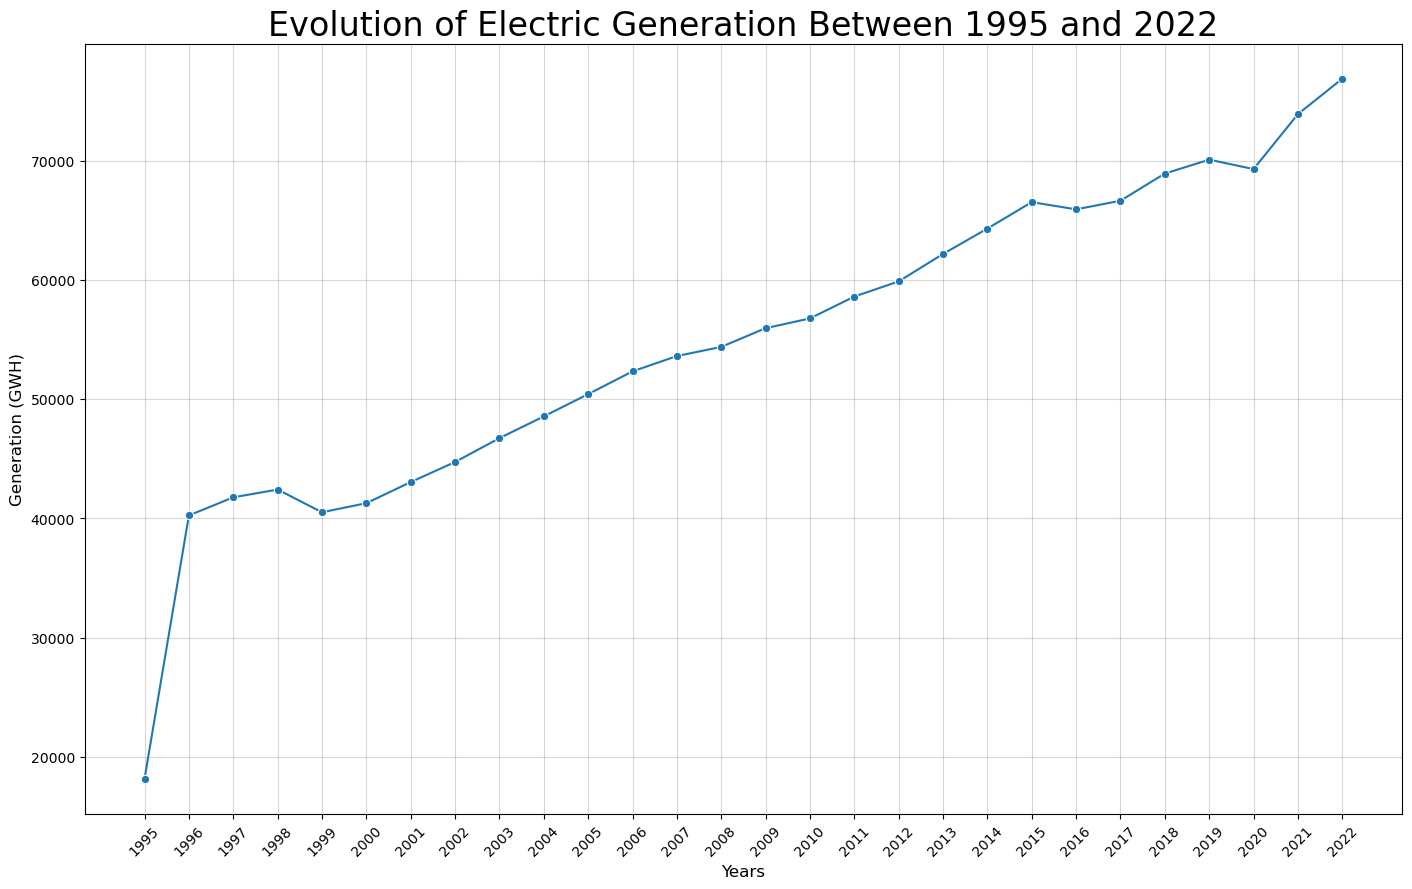

In [17]:
# 1 Convert the 'Fecha' column to just the year
try:
    yearlygeneration["Fecha"] = yearlygeneration["Fecha"].dt.year
except:
    pass

#2  Group by 'Fecha' and calculate the sum of numeric columns, then reset the index
data = yearlygeneration.groupby("Fecha").sum(numeric_only=True).reset_index()

# 3 Plot the data using Plotly
fig = px.line(data, x='Fecha', y='Total', title='Evolution of Electric Generation Between 1995 and 2022',
              labels={'Fecha': 'Years', 'Total': 'Generation (GWH)'}, markers=True)

# 3 Update the trace marker color
fig.update_traces(marker=dict(color='#EBA02E'))

# 3 Update layout properties
fig.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickformat=".0f"),
    template='plotly_white',
    title=dict(font=dict(size=30), x=0.5, xanchor='center'),
    xaxis_title=dict(font=dict(size=15)),
    yaxis_title=dict(font=dict(size=15)),
    legend=dict(font=dict(size=12)),
    width=1400,
    height=550
)

# Show the plot
fig.show()

#4 Seaborn PLot for Github Visualization
plt.figure(figsize=(17,10))
sns.lineplot(data=data,x='Fecha',y='Total',marker='o')
plt.title('Evolution of Electric Generation Between 1995 and 2022', fontsize=24)
plt.ylabel('Generation (GWH)',fontsize=12)
plt.xlabel('Years',fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(ticks=range(1995, 2023, 1), rotation=45)
plt.show()






### **4.2. Comparación entre tipos de generación.**  
 


#### **4.2.1. Participación de cada tipo de fuente en la matriz energética.**
   - Se utiliza un gráfico de barras para mostrar la distribución anual de la generación eléctrica por tipo. El gráfico presenta la "Fecha" en el eje X y la "Generación" (en GWH) en el eje Y, con colores diferenciados por el "Tipo Generacion".
   - Las etiquetas y el título se personalizan con `matplotlib` para mejorar la legibilidad.

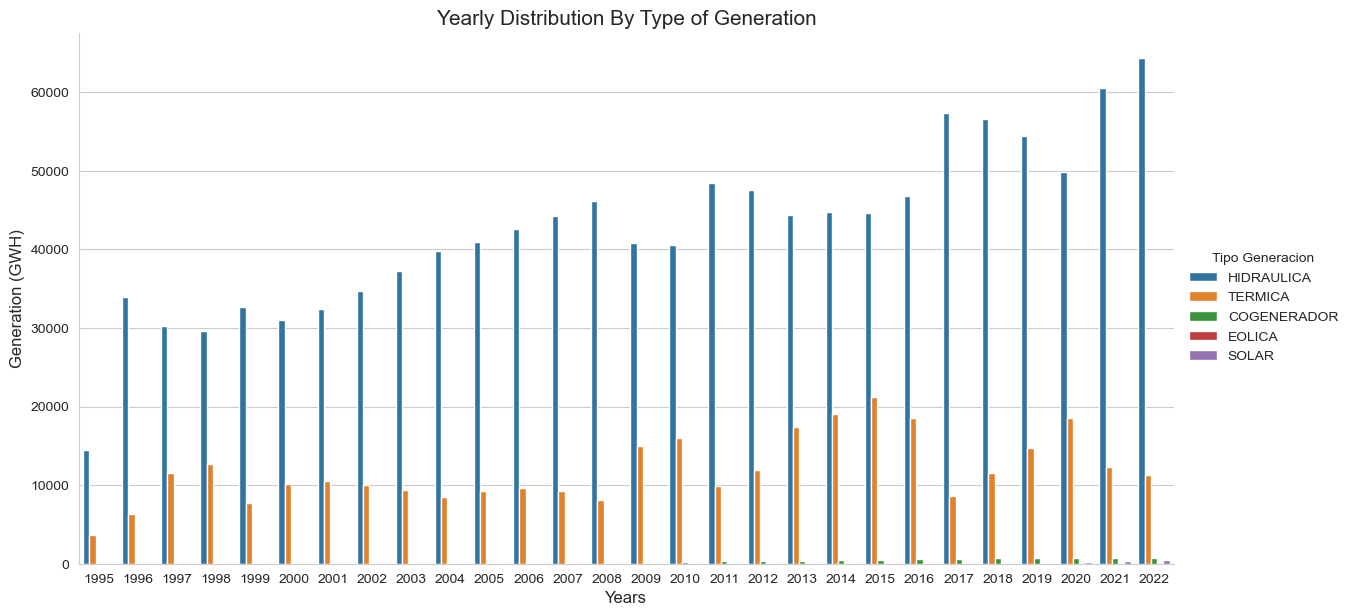

In [81]:

# Plot using Seaborn catplot
sns.catplot(data=yearlygeneration, kind="bar", x="Fecha", y="Total", hue="Tipo Generacion", height=6, aspect=2)

# Customize labels and title using matplotlib
plt.xlabel("Years", fontsize=12)
plt.ylabel("Generation (GWH)", fontsize=12)
plt.title("Yearly Distribution By Type of Generation", fontsize=15)

plt.show()


#### **4.2.2. Tendencias por tipo de generación.**

**Proceso:**
1. **Tendencias a largo plazo en la generación de energía térmica e hidroeléctrica:**
   - Se crea un gráfico de líneas para mostrar las tendencias de largo plazo en la generación de energía térmica (TERMICA) e hidroeléctrica (HIDRAULICA).
   - El gráfico incluye personalización de etiquetas, título, leyenda, y formato de la cuadrícula.

2. **Tendencias a largo plazo en la cogeneración, solar y eólica:**
   - Se genera otro gráfico de líneas para mostrar las tendencias de generación de energía eólica (EOLICA), solar (SOLAR) y cogeneración (COGENERADOR).
   - Al igual que en el gráfico anterior, se personaliza la visualización para mejorar la presentación.

3. **Distribución de la generación en cogeneración, solar y eólica:**
   - Se presenta un gráfico de barras que muestra la distribución anual de la generación en las fuentes de energía eólica, solar y cogeneración.
   - Se ajustan las etiquetas y la orientación de los ejes para facilitar la lectura.





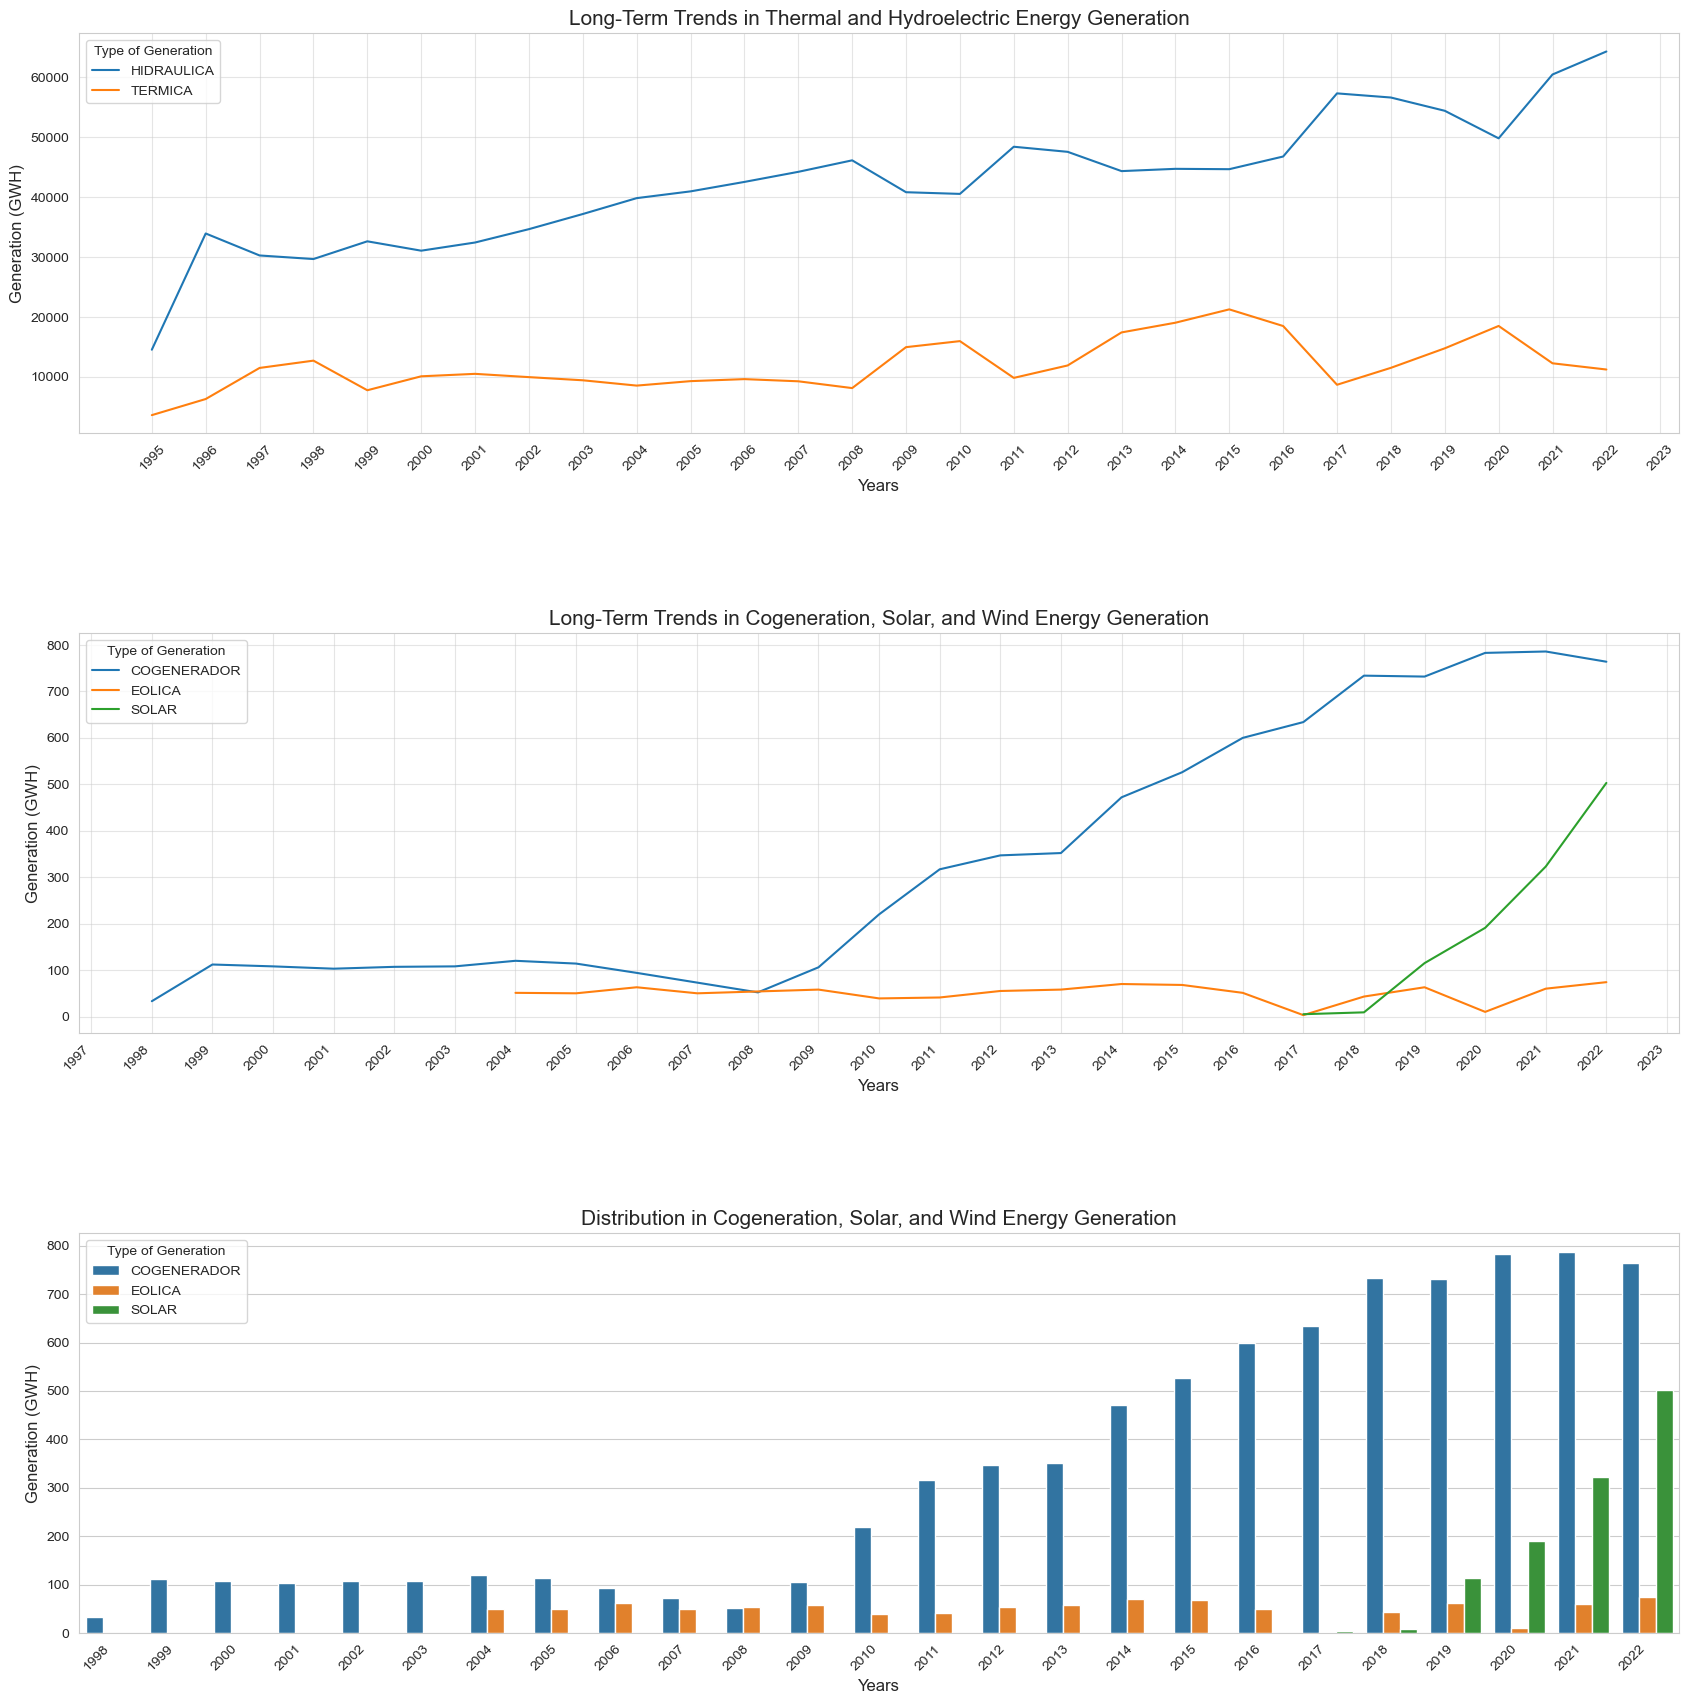

In [40]:

plt.figure(figsize=(20, 20))  # Set the overall figure size

# 1 Graph of Long-Term Trends in Thermal and Hydroelectric Energy Generation
plt.subplot(3, 1, 1)  # Create the first subplot
sns.lineplot(x="Fecha", y="Total", data=yearlygeneration.loc[(yearlygeneration["Tipo Generacion"]=="HIDRAULICA") | (yearlygeneration["Tipo Generacion"]=="TERMICA")], hue="Tipo Generacion")
plt.xlabel("Years", fontsize=12)
plt.ylabel("Generation (GWH)", fontsize=12)
plt.title("Long-Term Trends in Thermal and Hydroelectric Energy Generation", fontsize=15)
plt.legend(title="Type of Generation", loc='upper left', fontsize=10)
plt.grid(alpha=0.5)
plt.xticks(ticks=range(1995, 2024, 1), rotation=45)

#2  Graph of Long-Term Trends in Cogeneration, Solar, and Wind Energy Generation
plt.subplot(3, 1, 2)  # Create the second subplot
sns.lineplot(x="Fecha", y="Total", data=yearlygeneration.loc[(yearlygeneration["Tipo Generacion"]=="EOLICA") | (yearlygeneration["Tipo Generacion"]=="SOLAR") | (yearlygeneration["Tipo Generacion"]=="COGENERADOR") ], hue="Tipo Generacion")
plt.xlabel("Years", fontsize=12)
plt.ylabel("Generation (GWH)", fontsize=12)
plt.title("Long-Term Trends in Cogeneration, Solar, and Wind Energy Generation", fontsize=15)
plt.legend(title="Type of Generation", loc='upper left', fontsize=10)
plt.grid(alpha=0.5)
plt.xticks(ticks=range(1997,2024,1),rotation=45, ha='right')  # Rotate x-axis labels for better visibility


# 3 Graph of Long-Term Distribution in Cogeneration, Solar, and Wind Energy Generation
plt.subplot(3, 1, 3)  # Create the third subplot
sns.barplot(x="Fecha", y="Total", data=yearlygeneration.loc[(yearlygeneration["Tipo Generacion"]=="EOLICA") | (yearlygeneration["Tipo Generacion"]=="SOLAR") | (yearlygeneration["Tipo Generacion"]=="COGENERADOR")], hue="Tipo Generacion")
plt.xlabel("Years", fontsize=12)
plt.ylabel("Generation (GWH)", fontsize=12)
plt.title("Distribution in Cogeneration, Solar, and Wind Energy Generation", fontsize=15)
plt.legend(title="Type of Generation", loc='upper left', fontsize=10)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)

plt.show()  # Display the plot

###  **4.3. Análisis** 

1. La generación eléctrica del país ha ido aumentando de manera lineal, por lo que la generación futura puede predecirse utilizando modelos de regresión lineal.

2. La generación de electricidad del país está dominada principalmente por fuentes hidroeléctricas y térmicas. Otras formas de generación representan un porcentaje mínimo en comparación, lo que resalta la dependencia del país en estas dos fuentes principales de energía para satisfacer la demanda eléctrica.

3. La segunda imagen muestra claramente una relación inversa entre la generación de energía hidroeléctrica y térmica. Específicamente, la generación térmica aumenta cuando disminuye la generación hidroeléctrica, lo que sugiere un mecanismo compensatorio para garantizar un suministro constante de energía.

4. Desde su introducción en el Sistema Interconectado Nacional (SIN) en 2017, la generación de energía solar ha experimentado un crecimiento exponencial. Este aumento refleja tanto una mayor adopción de tecnologías solares como una creciente inversión en fuentes de energía renovable, contribuyendo significativamente a la diversificación de la matriz energética.


## **5. Modelo de Regresión**   

### **5.1. Modelo de regresión lineal para predicción futura de generación eléctrica.**

**Proceso:**

1. **Inicialización y ajuste del modelo:**
   - Se utiliza el modelo de regresión lineal (`LinearRegression()`) para ajustar los datos históricos de generación eléctrica. El modelo se ajusta a los valores de la columna "Fecha" (año) y "Total" (generación en GWH).
   
2. **Predicción para el año 2023:**
   - Se realiza una predicción para la generación eléctrica en el año 2023 usando el modelo ajustado.

3. **Visualización con Plotly:**
   - Se genera un gráfico de líneas con `plotly` que muestra la evolución de la generación eléctrica a lo largo de los años. Se incluye un marcador para la predicción de 2023 (en rojo) y el valor verdadero de 2023 (en verde), mostrando la comparación visual entre ambos.

4. **Visualización con Seaborn:**
   - Se genera un gráfico de líneas y puntos usando `seaborn` para mostrar la evolución de la generación y la predicción de 2023. Se incluyen anotaciones para los valores de la predicción y el valor verdadero.

5. **Cálculo de la diferencia relativa:**
   - Se calcula y se imprime la diferencia porcentual entre la predicción del modelo y el valor real de la generación de 2023.

**Notas:**
- El valor predicho por el modelo de regresión lineal para el año 2023 es de aproximadamente **[predicción] GWH**, mientras que el valor real es **80,687.35 GWH**.
- La diferencia entre la predicción y el valor real es de aproximadamente **[diferencia %]**%.




Prediction for 2023: 77291.76 GWH


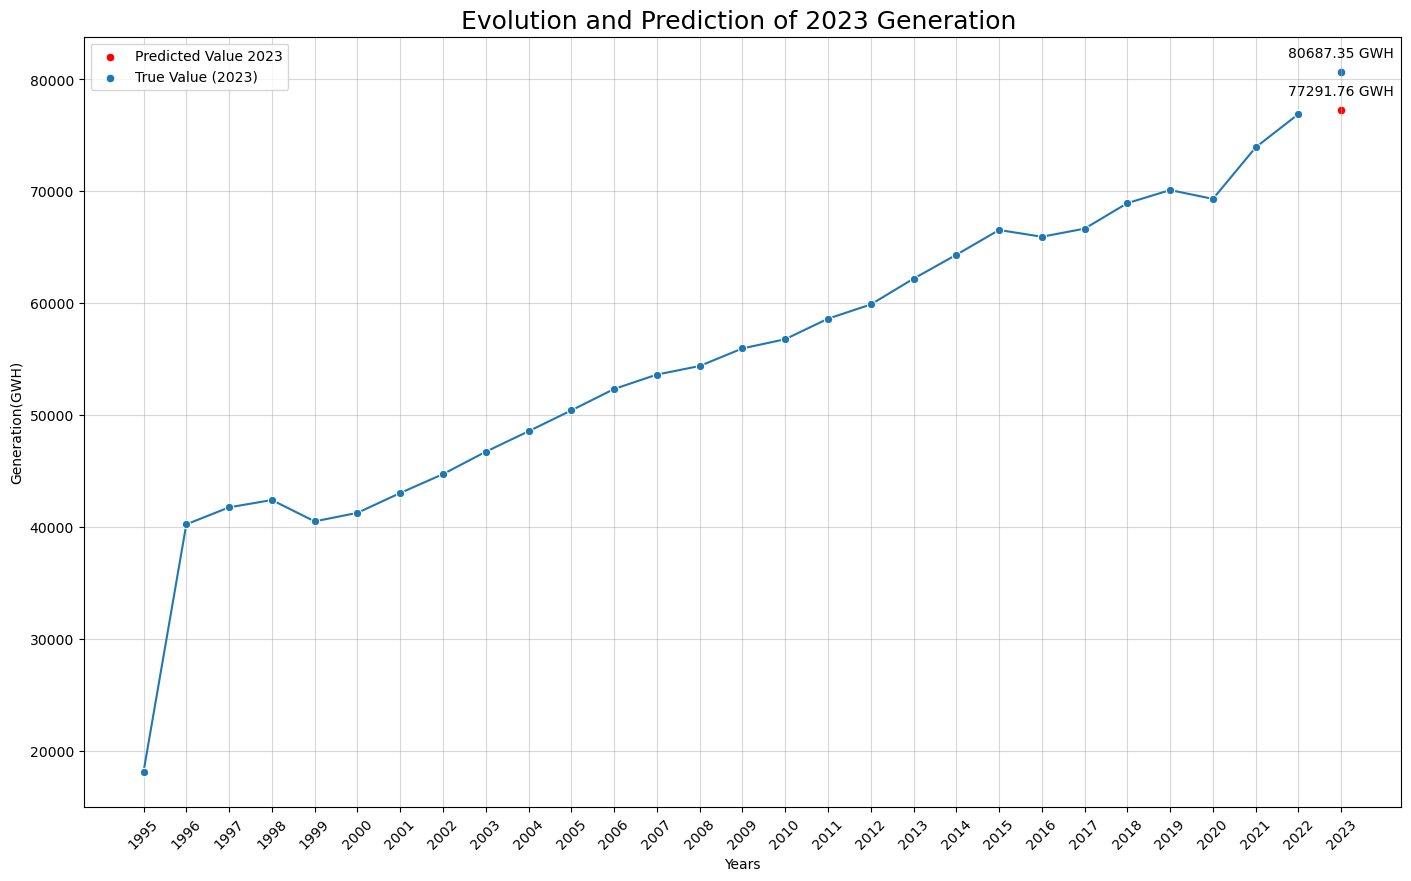

The value predicted by the linear regression model is 77291.76 GWh (shown in red on the graph), while the actual value is 80,687.35 GWh (shown in green).
the difference between the predicted value and the true value is: 4.21 %


In [20]:


#1  Initialize the Linear Regression model
temp_reg = LinearRegression()

#1  Fit the model to the data
temp_reg.fit(np.array(data["Fecha"]).reshape(-1, 1), np.array(data["Total"]).reshape(-1, 1))

# 2 Predict the value for the year 2023
prediccion = temp_reg.predict(np.array(2023).reshape(1, -1)).item()

# Print the prediction for 2023
print(f"Prediction for 2023: {round(prediccion,2)} GWH")

#3 Plot the data using Plotly
fig = px.line(data, x='Fecha', y='Total', title='Evolution and Prediction of 2023 Generation ',
              labels={'Fecha': 'Years', 'Total': 'Generation (GWH)'}, markers=True)

#3 Update the trace marker color
fig.update_traces(marker=dict(color='#EBA02E'))

#3 Add the prediction point
fig.add_trace(go.Scatter(
    x=[2023], y=[prediccion],
    mode='markers', name='Predicted value',
    marker=dict(color='red', size=10)
))

#3 Add the true value point
fig.add_trace(go.Scatter(
    x=[2023], y=[80687.35],
    mode='markers', name='True Value',
    marker=dict(color='green', size=10)
))

#3 Update the layout
fig.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickformat=".0f"),
    template='plotly_white',
    title=dict(font=dict(size=20), x=0.5,  # Centring the title
        xanchor='center',),
    xaxis_title=dict(font=dict(size=15)),
    yaxis_title=dict(font=dict(size=15)),
    legend=dict(font=dict(size=12)),width=1400,height=700
)

# Show the plot
fig.show()

#4 Seaborn Plot for github visualization
plt.figure(figsize=(17,10))
sns.lineplot(x="Fecha",y="Total",data=data,marker='o')
sns.scatterplot(x=[2023],y=prediccion,color="red",label="Predicted Value 2023")
sns.scatterplot(x=[2023],y=80687.35,label="True Value (2023)")#dato verdadero sacado del dashboaard

plt.annotate(f'{prediccion:.2f} GWH', (2023, prediccion), textcoords="offset points", xytext=(0,10), ha='center')


plt.annotate(f'{80687.35:.2f} GWH', (2023, 80687.35), textcoords="offset points", xytext=(0,10), ha='center')
plt.grid(alpha=0.5)
plt.xticks(ticks=range(1995, 2024, 1), rotation=45)
plt.title('Evolution and Prediction of 2023 Generation ',fontsize=18)
plt.xlabel('Years')
plt.ylabel('Generation(GWH)')
plt.show()
#5
print(f"The value predicted by the linear regression model is {round(prediccion,2)} GWh (shown in red on the graph), while the actual value is 80,687.35 GWh (shown in green).")
print(f"the difference between the predicted value and the true value is: {round((80687.35-prediccion)/80687.35*100,2)} %")


  #### **5.1. Análisis** 
  - El modelo de regresión lineal realizado con scikit-learn predice el valor de la generación de 2023 con un 96.8% de precisión, lo que confirma la evolución lineal de la generación eléctrica en Colombia.



## **6. Relación con Fenómenos Climáticos (El Niño y La Niña)**  




### **6.1. Generación renovable por año.**

**Proceso:**
#### **6.1.1. Generación de Energía Renovable entre 1995 y 2022**
   1. **Preparación de los datos de generación renovable:**
      - Se reorganiza el DataFrame `yearlygeneration` para tener el año como índice, el tipo de generación como columnas y los valores de generación total.
      - Se reemplazan los valores nulos con 0 y se calcula la generación total por año.
      - Luego, se calcula el porcentaje de la generación renovable (EOLICA, HIDRAULICA, SOLAR) con respecto a la generación total de cada año.
   2. **Visualización  generación renovable :**
      - Se genera un gráfico de barras de los porcentajes de generación renovable a lo largo de los años, mostrando la evolución de la participación de la energía renovable.


   **Gráfico : Evolución del porcentaje de generación renovable a lo largo de los años:**
   - Este gráfico muestra la evolución del porcentaje de generación renovable en los años entre 1995 y 2022.


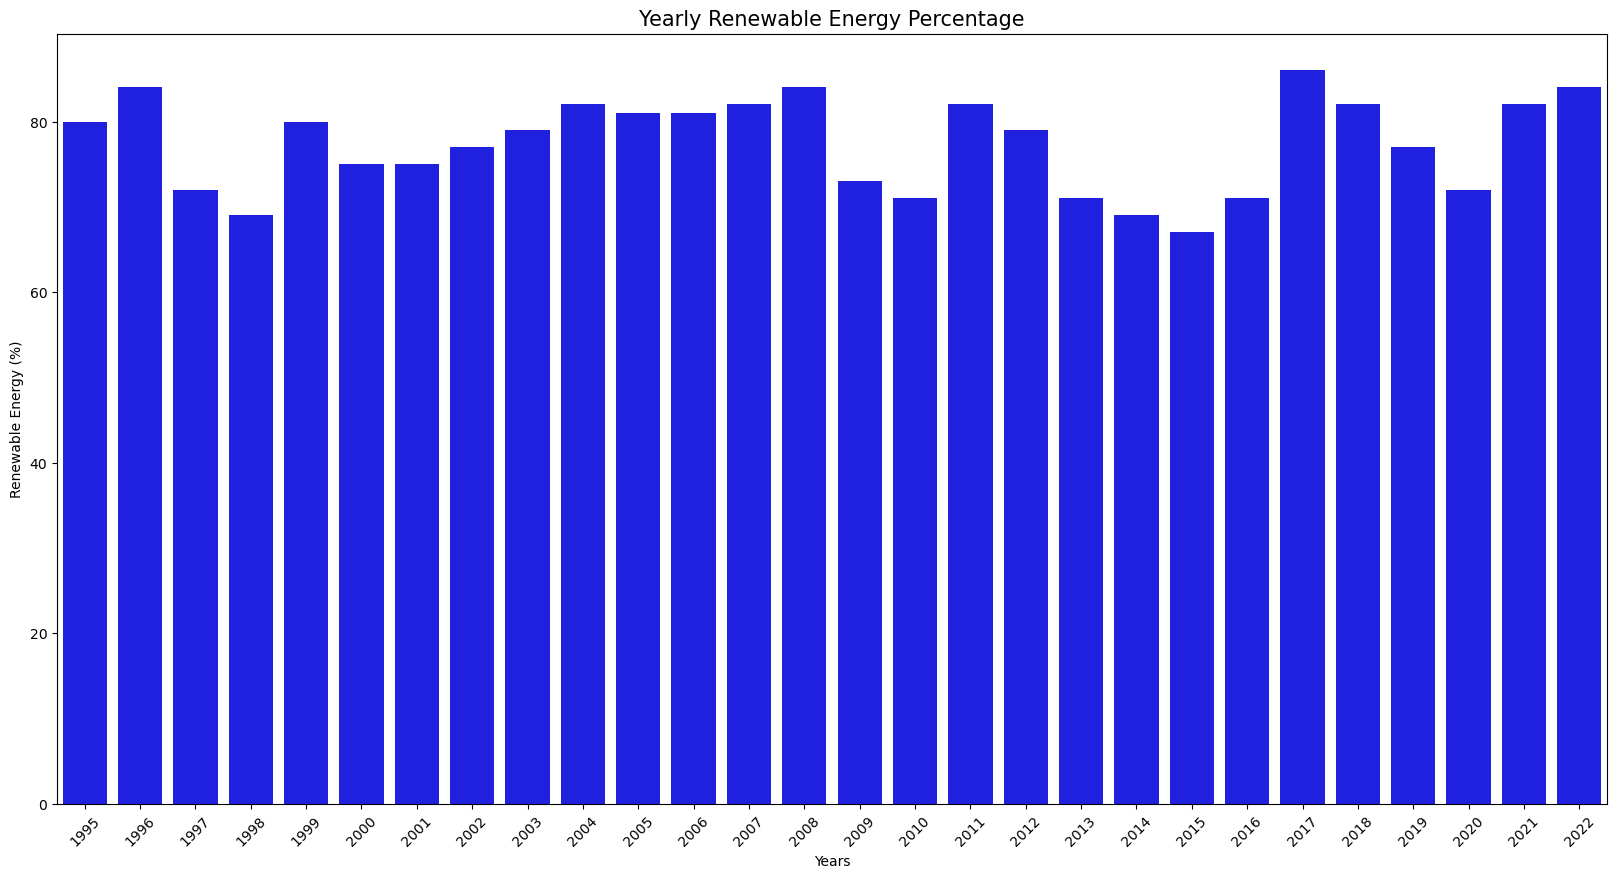

In [21]:
# 1 Pivot the yearlygeneration DataFrame to have 'Fecha' as index, 'Tipo Generacion' as columns, and 'Total' as values
renewableyear = yearlygeneration.pivot(index="Fecha", columns='Tipo Generacion', values='Total')

# 1 Replace NaN values with 0
renewableyear = renewableyear.replace(np.nan, 0)

# 1 Calculate the total generation per year
renewableyear["Total"] = renewableyear.sum(numeric_only=True, axis=1)

# 1 Calculate the percentage of renewable generation (EOLICA, HIDRAULICA, SOLAR) as part of total generation
renewableyear["Renovable(%)"] = round(renewableyear[["EOLICA", "HIDRAULICA", "SOLAR"]].sum(numeric_only=True, axis=1) / renewableyear["Total"] * 100, 2)

# 1 Convert all columns to integers
for i in renewableyear.columns:
    renewableyear[i] = renewableyear[i].apply(lambda x: int(x))

renewableyear.reset_index(inplace=True)

# 2 Plotting using Seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x="Fecha", y="Renovable(%)", data=renewableyear, color='blue')

# 2 Customizing plot labels and title
plt.title("Yearly Renewable Energy Percentage", fontsize=15)
plt.ylabel("Renewable Energy (%)")
plt.xlabel("Years")
plt.xticks(rotation=45)  


plt.show()



#### **6.1.2. Relación entre Generación Renovable y Fenómenos Climáticos de El Niño y La Niña**

   1. **Obtención de datos de El Niño y La Niña:**
      - Se carga y procesa un archivo de datos de anomalías de temperatura para identificar las condiciones de El Niño, La Niña y Neutro para cada año.
      - Se clasifica cada año en una de estas tres categorías basadas en el promedio de la anomalía mensual.
   2. **Unión de datos de generación renovable y fenómenos climáticos:**
      - Se realiza un `merge` entre los datos de generación renovable y las condiciones climáticas de El Niño y La Niña según el año.
   3. **Visualización  generación renovable años de El Niño y La Niña:**
      - Se genera un gráfico de barras para comparar el porcentaje de generación renovable entre los años de El Niño y La Niña.

  **Gráfico : Comparación del porcentaje de generación renovable entre años de El Niño y La Niña:**
      - Este gráfico compara cómo varió el porcentaje de generación renovable en años con condiciones de El Niño y La Niña.


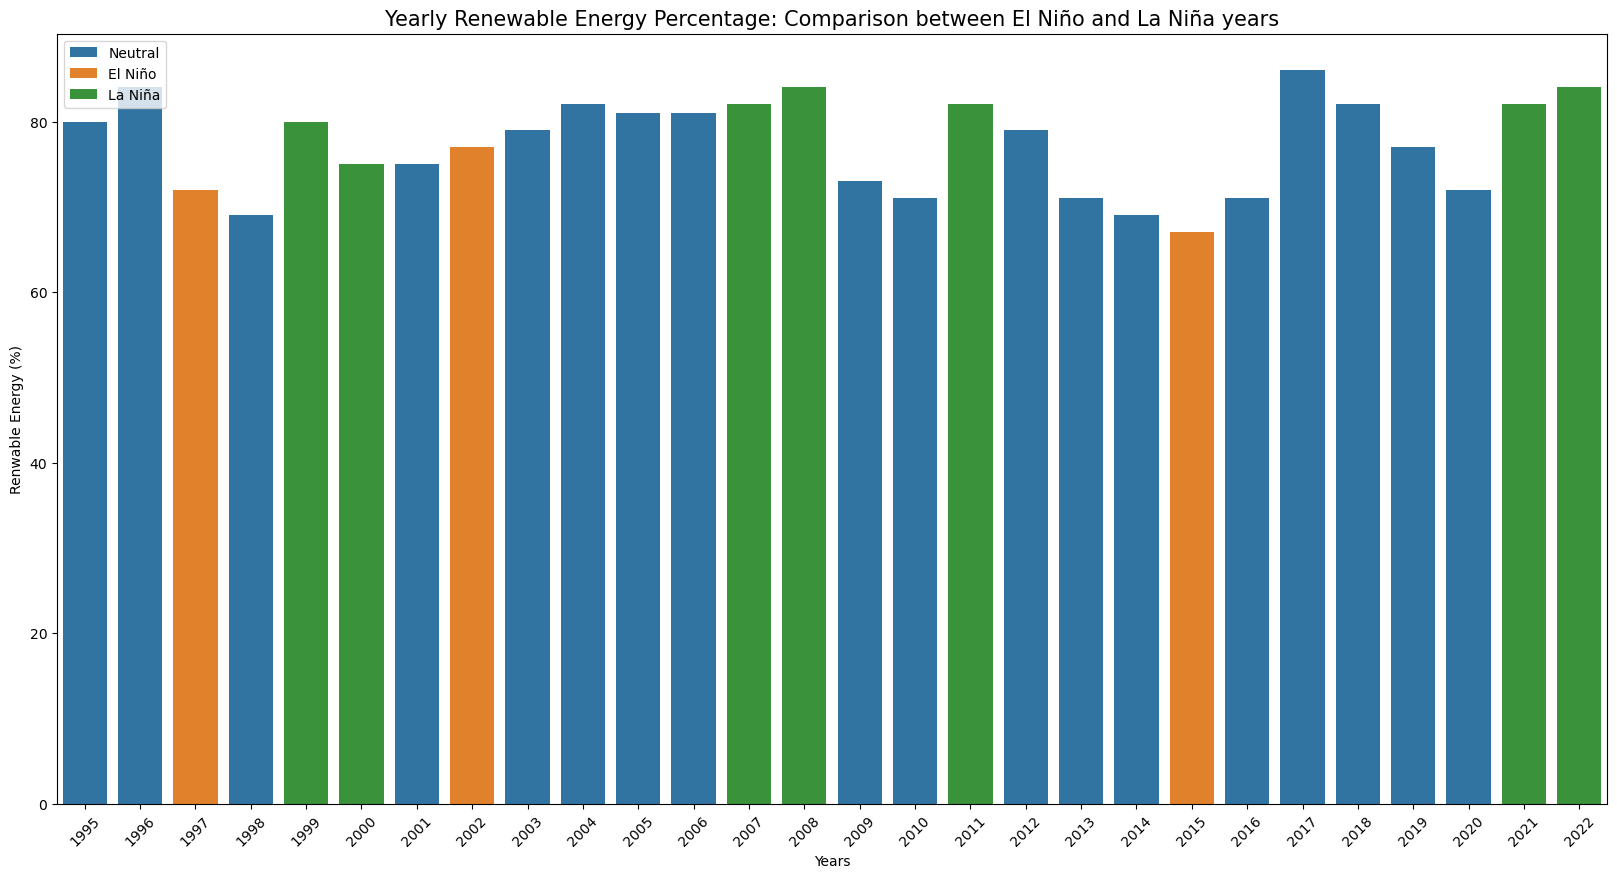

In [ ]:


# 3 URL of the ONI data
url = 'https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt'

# 3 Read the data into a DataFrame
oni = pd.read_csv(url, delim_whitespace=True, header=0)

# 3 Filter data for years >= 1995
oni = oni.loc[oni["YR"] >= 1995]

# 3 Pivot the data to have 'YR' as index, 'MON' as columns, and 'ANOM' as values
oni = oni.pivot(index="YR", columns='MON', values='ANOM')

# 3 Calculate the mean anomaly across months for each year
oni["Mean"] = oni.mean(numeric_only=True, axis=1)

# 3 Categorize each year as El Niño, La Niña, or Neutral based on mean anomaly
oni["Niño/a"] = oni["Mean"].apply(lambda promedio: "El Niño" if promedio > 0.5 else "La Niña" if promedio < -0.5 else "Neutral")

# 4 Reset index and rename 'YR' column to 'Fecha'
oni.reset_index(inplace=True)
oni.rename(columns={"YR": "Fecha"}, inplace=True)

# 4 Selecting only the necessary columns from 'oni'
oni2 = oni[["Fecha", "Mean", "Niño/a"]]

# 4 Performing an inner merge on 'Fecha' column
renewableyear_oni = renewableyear.merge(oni2, how="inner", on="Fecha")

#5 Ploting the Yearly Renewable Energy Percentage differenced by the niño/a conditions
plt.figure(figsize=(20,10))
sns.barplot(x="Fecha",y="Renovable(%)",hue="Niño/a",data=renewableyear_oni,dodge=False)
plt.title("Yearly Renewable Energy Percentage: Comparison between El Niño and La Niña years",fontsize=15)
plt.legend(loc="best")
plt.ylabel("Renwable Energy (%)")
plt.xlabel("Years")
plt.xticks(rotation=45)

plt.show()


In [23]:

renewableyear_oni.to_csv("Renewable_year.csv")

#### **6.1.3 Análisis**  
- Existe un patrón notable en el que los años de La Niña están asociados con una mayor generación de energía renovable. Esto sugiere un posible impacto positivo de La Niña en los recursos renovables.

- Los años de El Niño suelen mostrar una menor generación de energía renovable, lo que indica un posible impacto negativo en los recursos renovables.

- La amplia gama de porcentajes de generación renovable durante los años neutrales resalta que otros factores climáticos y no climáticos juegan un papel significativo en la generación renovable de Colombia.



### **6.2. Generación renovable por mes.**  

**Proceso:**

#### **6.2.1. Agrupación de datos por mes:**
   - Se agrupan los datos de la variable `union` por mes, usando la columna `Fecha` con frecuencia mensual y `Tipo Generacion` como clave secundaria.
   - Luego, se suman los valores numéricos de generación para cada grupo.
   - Se aplica la función de redondeo a todas las columnas del DataFrame `renewablemonth`.








For the monthly analysis, it is necessary to group the generation by month using the union dataframe.

In [24]:
# 1 Group the 'union' DataFrame by month ('Fecha' key with monthly frequency) and 'Tipo Generacion'
grouped = union.groupby([pd.Grouper(key='Fecha', freq='M'), "Tipo Generacion"])

# 1 Sum the numeric values for each group
renewablemonth = grouped.sum(numeric_only=True)

# 1 Apply the rounding function to all columns of the 'renewablemonth' DataFrame
for i in renewablemonth.columns:
    redondeo_(renewablemonth, i)

# 1 Reset the index to turn 'Fecha' and 'Tipo Generacion' back into columns
renewablemonth.reset_index(inplace=True)

#1  Extract the month from the 'Fecha' column and create a new column 'Month'
renewablemonth["Month"] = renewablemonth["Fecha"].dt.month

# 1 Pivot the 'renewablemonth' DataFrame to have 'Fecha' and 'Month' as the index,
# 1 'Tipo Generacion' as the columns, and 'Total' as the values
result3 = renewablemonth.pivot(index=["Fecha", "Month"], columns='Tipo Generacion', values='Total')

# 1 Replace NaN values with 0
result3 = result3.replace(np.nan, 0)

# 1 Calculate the sum of all generation types per month and add it as a new column 'Sum'
result3["Sum"] = result3[result3.columns].sum(numeric_only=True, axis=1)



Tipo Generacion,Fecha,Month,COGENERADOR,EOLICA,HIDRAULICA,SOLAR,TERMICA,Sum,Renovable(%),Fecha_merge
0,1995-07-31,7,0,0,1051,0,229,1280,82,1995
1,1995-08-31,8,0,0,2781,0,575,3356,82,1995
2,1995-09-30,9,0,0,2651,0,671,3322,79,1995
3,1995-10-31,10,0,0,2804,0,635,3439,81,1995
4,1995-11-30,11,0,0,2719,0,654,3373,80,1995
5,1995-12-31,12,0,0,2530,0,848,3378,74,1995
6,1996-01-31,1,0,0,2449,0,853,3302,74,1996
7,1996-02-29,2,0,0,2717,0,506,3223,84,1996
8,1996-03-31,3,0,0,2968,0,469,3437,86,1996
9,1996-04-30,4,0,0,2874,0,405,3279,87,1996


#### **6.2.2. Cálculo del porcentaje de generación renovable por mes:**
   - Se calcula la generación renovable en términos de EOLICA, HIDRAULICA y SOLAR, dividiendo la suma de estas por la suma total de generación de cada mes y multiplicando por 100.
   - Se convierten las columnas a enteros para mejorar la visualización.


In [ ]:
# 2 Calculate the percentage of renewable generation (EOLICA, HIDRAULICA, SOLAR) per month
result3["Renovable(%)"] = round(result3[["EOLICA", "HIDRAULICA", "SOLAR"]].sum(numeric_only=True, axis=1) / result3["Sum"] * 100, 2)

# 2 Convert all columns to integers
for i in result3.columns:
    result3[i] = result3[i].apply(lambda x: int(x))

# 2 Reset the index to turn 'Fecha' and 'Month' back into columns
result3.reset_index(inplace=True)

# 2 Create a new column 'Fecha_merge' for merging, extracting the year from 'Fecha'
result3['Fecha_merge'] = result3["Fecha"].dt.year

# 2 Display the first 10 rows of the 'result3' DataFrame
result3.head(10)

#### **6.2.3. Obtención de datos de El Niño y La Niña por mes:**
   - Se carga y procesa el archivo de anomalías de temperatura para categorizar cada mes en función de las condiciones de El Niño, La Niña o Neutral.
   - Se renombran las columnas relevantes para hacerla más comprensible y se filtran los datos por los años desde 1995.



In [25]:
# 3 Define the URL for the ONI data
url = 'https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt'

# 3 Read the ONI data from the URL using whitespace as the delimiter
oni = pd.read_csv(url, delim_whitespace=True, header=0)

# 3 Filter the data to include only rows where the year (YR) is 1995 or later
oni = oni.loc[(oni["YR"] >= 1995)]


# 3 Agregar una nueva columna "niño" calculando el promedio
oni["niño"] = oni["ANOM"].rolling(window=3, center=True, min_periods=1).mean()
# Create a new column 'Niño/a' based on the 'ANOM' values
# If 'ANOM' is greater than 0.5, set it to "El Niño"
# If 'ANOM' is less than -0.5, set it to "La Niña"
# 3 Otherwise, set it to "Neutral"
oni["Niño/a"] = oni["niño"].apply(lambda promedio: "El Niño" if promedio > 0.5 else "La Niña" if promedio < -0.5 else "Neutral")

# 3 Rename columns 'YR' to 'Fecha_merge' and 'MON' to 'Month'
oni.rename(columns={"YR": "Fecha_merge", "MON": "Month"}, inplace=True)

# Display the first 15 rows of the 'oni' DataFrame
oni.head(15)



,Fecha_merge,Month,TOTAL,ClimAdjust,ANOM,niño,Niño/a
540,1995,1,27.57,26.59,0.98,0.845000,El Niño
541,1995,2,27.49,26.79,0.71,0.723333,El Niño
542,1995,3,27.76,27.28,0.48,0.533333,El Niño
543,1995,4,28.11,27.70,0.41,0.303333,Neutral
544,1995,5,27.83,27.80,0.02,0.140000,Neutral
545,1995,6,27.59,27.60,-0.01,-0.033333,Neutral
546,1995,7,27.08,27.19,-0.11,-0.243333,Neutral
547,1995,8,26.23,26.84,-0.61,-0.540000,La Niña
548,1995,9,25.88,26.78,-0.90,-0.810000,La Niña
549,1995,10,25.84,26.76,-0.92,-0.973333,La Niña


####  **6.2.4. Unión de datos de generación renovable y condiciones climáticas:**
   - Se realiza una combinación (merge) entre el DataFrame `renewablemonth` y los datos de anomalía climática (`oni`) con base en el año y el mes.
   - Se elimina la columna auxiliar `Fecha_merge` que se utilizó para la unión.


In [26]:
#  Select relevant columns from the 'oni' DataFrame
oni2 = oni[["Fecha_merge", "Month", "ANOM", "Niño/a"]]

#  Merge the 'result3' DataFrame with 'oni2' on 'Fecha_merge' and 'Month'
renewablemonth_oni = result3.merge(oni2, how="inner", on=["Fecha_merge", "Month"])

# 3Drop the 'Fecha_merge' column from the merged DataFrame
renewablemonth_oni = renewablemonth_oni.drop(columns="Fecha_merge")

# Save the 'renewablemonth_oni' DataFrame to a CSV file
renewablemonth_oni.to_csv("Renwable_month.csv")

# Display the last 15 rows of the 'renewablemonth_oni' DataFrame
renewablemonth_oni.tail(15)


,Fecha,Month,COGENERADOR,EOLICA,HIDRAULICA,SOLAR,TERMICA,Sum,Renovable(%),ANOM,Niño/a
315,2021-10-31,10,68,3,5599,31,920,6621,85,-0.94,La Niña
316,2021-11-30,11,55,3,5346,34,853,6291,85,-0.94,La Niña
317,2021-12-31,12,84,5,4835,36,1359,6319,77,-1.06,La Niña
318,2022-01-31,1,86,4,4788,38,1361,6277,76,-0.95,La Niña
319,2022-02-28,2,81,4,4376,32,1390,5883,75,-0.89,La Niña
320,2022-03-31,3,67,5,5395,35,965,6467,84,-0.97,La Niña
321,2022-04-30,4,55,4,5290,33,857,6239,85,-1.11,La Niña
322,2022-05-31,5,37,3,5600,31,885,6556,85,-1.11,La Niña
323,2022-06-30,6,50,4,5281,30,838,6203,85,-0.75,La Niña
324,2022-07-31,7,64,8,5523,40,927,6562,84,-0.70,La Niña



#### **6.2.5. Guardado y visualización:**
   - Los resultados del DataFrame combinado se guardan en un archivo CSV y se visualizan mediante gráficos.

      **Gráficos:**

      1. **Porcentaje de Energía Renovable vs Años con condiciones de Niño/a:**
         - Un gráfico de dispersión muestra la relación entre el porcentaje de energía renovable y los años, categorizados por El Niño, La Niña y Neutral.

      2. **Generación (GWH) vs Años por Tipo de Generación:**
         - Se presenta un gráfico de líneas para mostrar las tendencias de generación por tipo de energía (HIDRAULICA, TERMICA) y asi facilitar la visualización de la correlación entre Meses de niño con la subidas o bajadas de la generacion termica.

      3. **Porcentaje de Energía Renovable vs Años comparando El Niño y La Niña:**
         - Un gráfico de dispersión muestra la comparación del porcentaje de energía renovable entre los meses con condiciones de El Niño y La Niña.

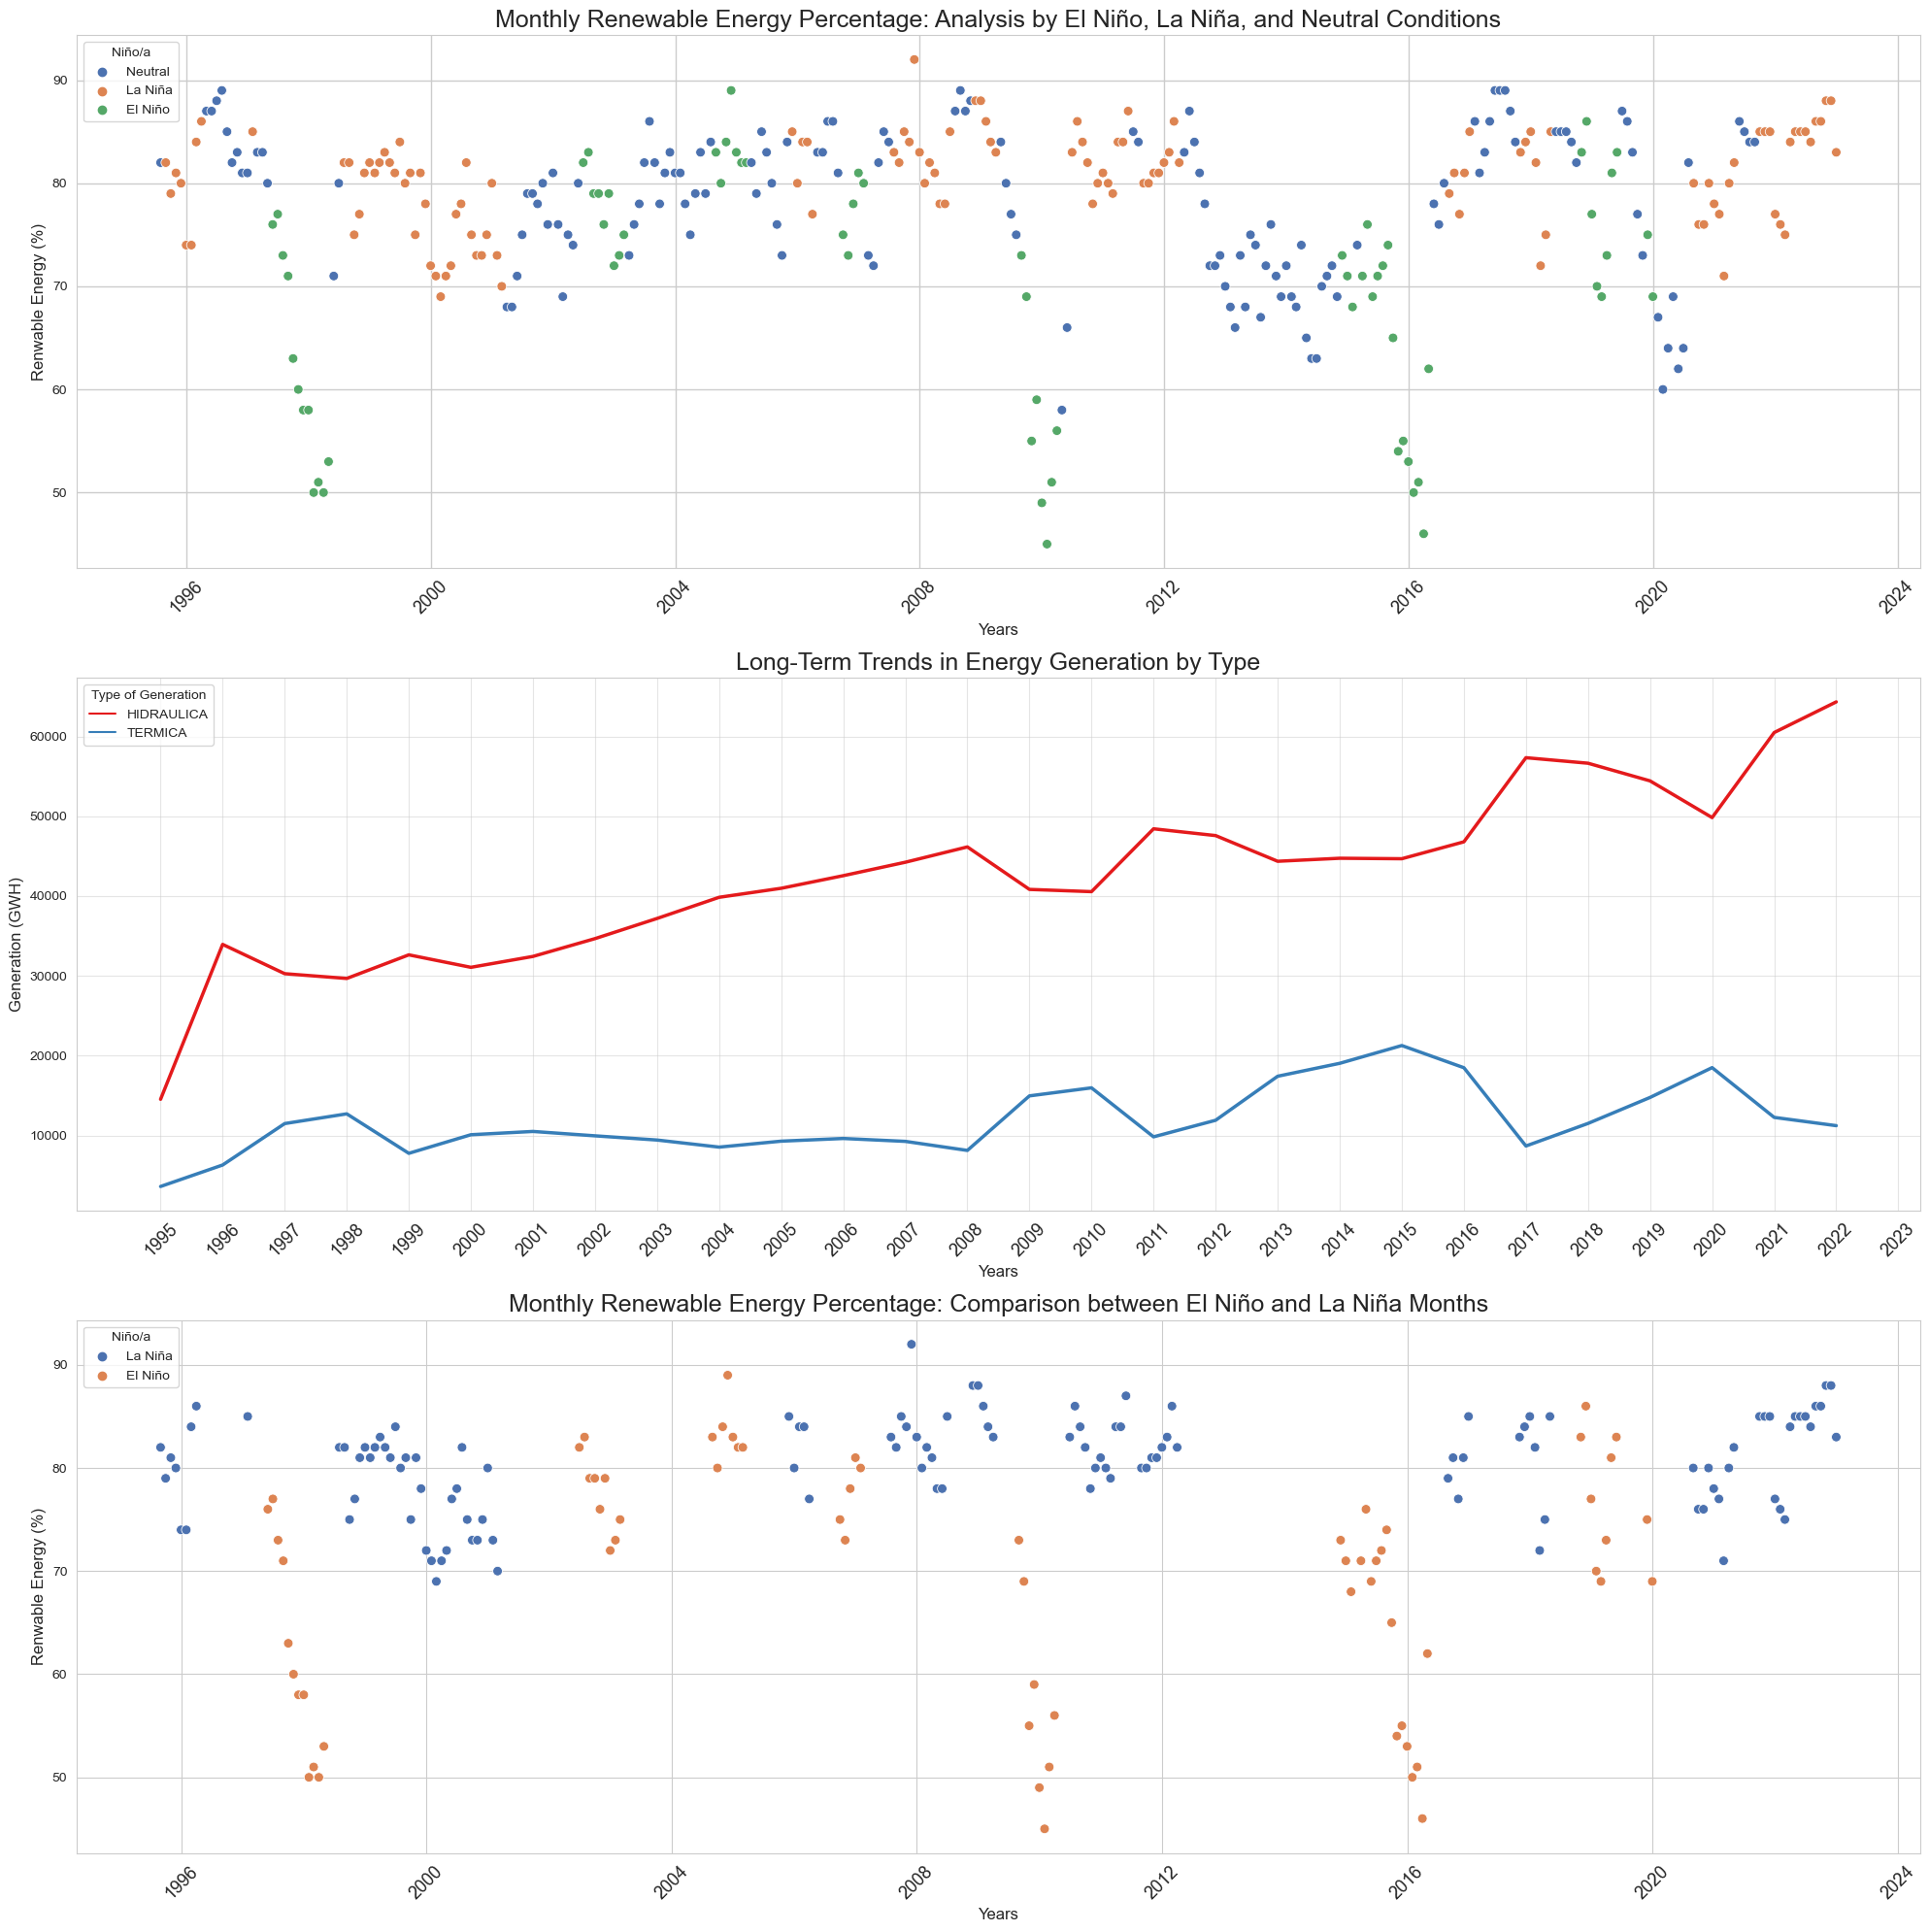

In [75]:


plt.figure(figsize=(20, 20))

# Subplot 1: % Renewable Energy vs Years with Niño/a categories
plt.subplot(3, 1, 1)
sns.set_style("whitegrid")
sns.scatterplot(x="Fecha", y="Renovable(%)", data=renewablemonth_oni, hue="Niño/a", palette="deep", s=50)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Renwable Energy (%)", fontsize=12)
plt.title("Monthly Renewable Energy Percentage: Analysis by El Niño, La Niña, and Neutral Conditions", fontsize=18)
plt.legend(title="Niño/a", loc='best', fontsize=10)
plt.xticks(rotation=45, fontsize=13)
plt.grid( linestyle='-', linewidth=1)

# Subplot 2: Generation (GWH) vs Years by Tipo Generacion
plt.subplot(3, 1, 2)
sns.lineplot(x="Fecha", y="Total", data=yearlygeneration.loc[(yearlygeneration["Tipo Generacion"]=="HIDRAULICA") | (yearlygeneration["Tipo Generacion"]=="TERMICA")], hue="Tipo Generacion", palette="Set1", linewidth=2.5)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Generation (GWH)", fontsize=12)
plt.grid(alpha=0.5)
plt.title("Long-Term Trends in Energy Generation by Type", fontsize=18)
plt.legend(title="Type of Generation", loc='upper left', fontsize=10)
plt.xticks(ticks=range(1995, 2024, 1), rotation=45, fontsize=13)

# Subplot 3: % Renewable Energy vs Years with El Niño and La Niña
plt.subplot(3, 1, 3)
sns.set_style("whitegrid")
sns.scatterplot(x="Fecha", y="Renovable(%)", data=renewablemonth_oni.loc[(renewablemonth_oni["Niño/a"]=="El Niño") | (renewablemonth_oni["Niño/a"]=="La Niña")], hue="Niño/a", palette="deep", s=50)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Renwable Energy (%)", fontsize=12)
plt.title("Monthly Renewable Energy Percentage: Comparison between El Niño and La Niña Months", fontsize=18)
plt.legend(title="Niño/a", loc='best', fontsize=10)
plt.xticks(rotation=45, fontsize=13)

plt.tight_layout()
plt.show()


#### **6.2.6 Análisis**  
- El análisis mensual refuerza de manera consistente los hallazgos del análisis anual, destacando un patrón claro en el que los meses de La Niña se correlacionan con un aumento en la generación de energía renovable. Este patrón fortalece aún más la comprensión de que factores ambientales, como La Niña, juegan un papel significativo en la configuración de las tendencias de producción de energía en Colombia.

- Es evidente que durante los meses de El Niño hay una disminución notable en el porcentaje de generación de energía renovable. Esta observación se alinea perfectamente lo dicho anteriormente, donde los períodos de El Niño a menudo coinciden con una reducción en la producción hidroeléctrica debido a la escasez de agua. En consecuencia, las plantas térmicas asumen el vacío de demanda de energía dejado por las limitaciones hidroeléctricas, subrayand


## **7. Power Bi Dashboard**

### **7.1. Preparación de datos para el dashboard.**

**Proceso:**

1. **Copia de datos:**
   - Se crea una copia del DataFrame `union` llamada `powerbidata` para evitar modificar los datos originales.

2. **Cálculos de columnas:**
   - Se calcula la suma total de la columna `Total` de la variable `powerbidata` una sola vez, para evitar recalcularla en cada iteración.
   - Se crean las siguientes nuevas columnas:
     - **Renovable:** Se calcula como la proporción de generación renovable (EOLICA, HIDRAULICA, SOLAR) respecto al total.
     - **NO Renovable:** Se calcula para las fuentes de energía no renovables (COGENERADOR, TERMICA).
     - **Participacion %:** Se calcula la proporción de cada tipo de generación sobre el total.

3. **Verificación de resultados:**
   - Se imprimen las sumas de las columnas `Renovable`, `NO Renovable` y `Participacion %` para asegurar que los cálculos son correctos.

4. **Dashboard de Power BI:**
   - Se genera un código HTML que permite incrustar el Dashboard de Power BI en el notebook.
   - El iframe del Dashboard se incluye para su visualización.



In [28]:
# Using numpy
# Create a copy of the 'union' DataFrame
powerbidata = union.copy()

# Calculate the total sum of the 'Total' column once to avoid recalculating it in each iteration
total_sum = powerbidata["Total"].sum()

# Create a boolean mask for the conditions
mask = powerbidata["Tipo Generacion"].isin(['HIDRAULICA', 'EOLICA', 'SOLAR'])

# Calculate the 'Renovable' column based on the mask and divide by the total sum
powerbidata["Renovable"] = np.where(mask, powerbidata["Total"] / total_sum, 0)

# Calculate the 'NO Renovable' column for specific 'Tipo Generacion' values and divide by the total sum
powerbidata["NO Renovable"] = np.where(powerbidata["Tipo Generacion"].isin(['COGENERADOR', 'TERMICA']), powerbidata["Total"] / total_sum, 0)

# Calculate the 'Participacion %' column by dividing 'Total' by the total sum
powerbidata["Participacion %"] = powerbidata["Total"] / total_sum

# Print the sum of 'Renovable' and 'NO Renovable' columns, rounded to the nearest integer
print(round(powerbidata["Renovable"].sum() + powerbidata["NO Renovable"].sum(), 0))

# Print the sum of the 'Participacion %' column
print(powerbidata["Participacion %"].sum())



1.0
1.0


In [29]:
from IPython.display import HTML

# Código HTML del Dashboard de Power BI
html_code_powerbi_dashboard = """
<iframe title="ElectricGeneration" width="1300" height="700" src="https://app.powerbi.com/view?r=eyJrIjoiYTJiMmFkM2UtYWFjNy00YjFjLTgxNDQtNGIzNTIwMjMwMjE1IiwidCI6IjUwNjQwNTg0LTJhNDAtNDIxNi1hODRiLTliM2VlMGYzZjZjZiIsImMiOjR9" frameborder="0" allowFullScreen="true"></iframe>
"""

# Mostrar el Dashboard dentro del notebook
display(HTML(html_code_powerbi_dashboard))

Follow this  [link](https://deepnote.com/workspace/mateofernandez-c7c6b165-b5e5-44be-9aa1-6f96867cde09/project/Electrical-Grid-Data-Analysis-and-Forecasting-50fba4dd-a54c-4a24-a882-e866564dde81/notebook/ElectricGeneration_colombia-b50831f41dec415dbfcef63a2645e5dc) to view the project in Deepnote. Which includes the visible Powerbi dasboard and the plots made with plotly.

## **8. Conclusiones**





1. La generación de electricidad del país depende en gran medida de fuentes hidroeléctricas y térmicas, con una contribución mínima de otras fuentes. Esto indica una dependencia de estas dos fuentes principales de energía para satisfacer la demanda eléctrica.

2. Existe un mecanismo compensatorio entre la generación de energía hidroeléctrica y térmica. Cuando la generación hidroeléctrica disminuye, la generación térmica aumenta, asegurando un suministro estable de energía.

3. Desde su integración al Sistema Interconectado Nacional (SIN) en 2017, la generación de energía solar ha crecido exponencialmente. Este crecimiento refleja una mayor adopción de tecnologías solares e inversiones en energía renovable, contribuyendo significativamente a la diversificación de la matriz energética del país.

4. Los años de La Niña están asociados con una mayor generación de energía renovable, lo que indica un impacto positivo en los recursos renovables. En cambio, los años de El Niño muestran una menor generación de energía renovable, lo que sugiere un impacto negativo en los recursos renovables.

5. El aumento lineal en la generación de electricidad del país sugiere que la generación futura puede preverse de manera efectiva utilizando modelos de regresión lineal.
6. La variabilidad en la generación de energía renovable durante los años neutrales sugiere que factores más allá de las condiciones climáticas, como influencias económicas, tecnológicas y políticas, juegan un papel importante en la generación de energía renovable en Colombia.
